In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model# import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

In [196]:
%matplotlib inline

In [245]:
cereal = pd.read_csv("cereals.csv")
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67


In [230]:
def adjust(data):
    for index, row in data.iterrows():
        #print(index)
        #print(data[index:])
        dvideby = 1 / data.cups[index]
        # print(dvideby)
        #print(row)
        data[index:] = data[index:] * dvideby
    return data
adjust(cereal)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,9.090909,3.030303,1
1,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3.000000,1.000000,1
2,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,9.090909,3.030303,1
3,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1
4,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,-1.333333,33.333333,4.000000,1.333333,1
5,146.666667,2.666667,2.666667,240.000000,2.000000,14.000000,13.333333,93.333333,33.333333,1.333333,1.333333,1
6,110.000000,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,30.000000,25.000000,2.000000,1.000000,1
7,173.333333,4.000000,2.666667,280.000000,2.666667,24.000000,10.666667,133.333333,33.333333,4.000000,1.773333,1
8,134.328358,2.985075,1.492537,298.507463,5.970149,22.388060,8.955224,186.567164,37.313433,1.492537,1.492537,1
9,134.328358,4.477612,0.000000,313.432836,7.462687,19.402985,7.462687,283.582090,37.313433,4.477612,1.492537,1


In [247]:
cerealmis = cereal[cereal.carbo == -1]
cereal = cereal[cereal >= 0]
cerealmiscol = cerealmis[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
cereal = cereal.dropna()
celist = list(cerealmiscol.iloc[0,:])
print(cerealmis)

    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
57       100        5    2       0    2.7     -1      -1     110         0   

    shelf  weight  cups  
57      1       1  0.67  


In [242]:
#print(cereal.describe())
print("carbo", "sugars", "potass")
cereal_train, cereal_test = train_test_split(cereal)
#print(cereal_train.columns)
input_data = cereal_train[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
input_data_test = cereal_test[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
carbo = cereal_train[['carbo']]
carbo_test = cereal_test[["carbo"]]
input_data.head()

carbo sugars potass


,calories,protein,fat,sodium,fiber,sugars,potass,vitamins,shelf,weight,cups
26,100,3,0,0,3.0,7,100,25,2,1,0.80
32,100,3,1,140,3.0,5,85,25,3,1,0.88
36,110,3,1,250,1.5,10,90,25,1,1,0.75
24,110,2,1,125,1.0,13,30,25,2,1,1.00
21,110,2,0,220,1.0,3,30,25,3,1,1.00


In [248]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(input_data, carbo)
print(regr2.score(input_data_test, carbo_test))
regr2.predict(celist)

0.930833809873


array([[ 16.52388019]])

In [246]:
names = cereal.pop('name')
mfr = cereal.pop('mfr')
protein = cereal.pop('type')
cereal.head()
pca = PCA(n_components=2)
pca.fit(cereal)
reduced_cereal = pca.transform(cereal)
reduced_cereal

array([[ -50.22468793, -180.7727469 ],
       [-148.55671338,  -24.3098366 ],
       [  74.31644781, -232.90274977],
       [ -46.62792086, -231.68597802],
       [  49.0094194 ,   92.80715984],
       [  22.40755025,   24.03344232],
       [ -28.02191741,   69.08509556],
       [  50.77438357,   -8.37130827],
       [  35.44457412,  -32.73940313],
       [  39.03851642,  -98.41537428],
       [  66.0421344 ,   55.18429872],
       [ 127.71469411,  -21.1910166 ],
       [  55.2144927 ,   46.21671984],
       [ -20.40588934,   -6.93176653],
       [  23.89813221,   39.02458741],
       [ 125.62887372,   59.51017385],
       [ 133.76647012,   48.47120809],
       [ -61.5867875 ,   82.42317562],
       [  22.94031361,   29.07969401],
       [ -25.74139275,  -61.74678696],
       [ -72.64175202,  104.85117907],
       [  65.89298752,   60.21308123],
       [ -22.60981627,  -21.97323954],
       [  30.69388048,   13.20220662],
       [ -28.02788361,   69.08444224],
       [  46.53982086,   

In [232]:
reduced_cereal

array([[ -6.80015884e+02,   2.56118419e+02],
       [  1.28791719e+02,   1.55519800e+02],
       [ -9.97171730e+02,   1.22519253e+01],
       [ -4.41408197e+02,   2.51204941e+02],
       [  9.06710704e+01,  -1.30867972e+02],
       [  2.94522049e+01,  -5.39579674e+01],
       [  1.52158728e+02,   5.58099764e+00],
       [ -3.03316485e+01,  -6.57815590e+01],
       [ -7.62534178e+01,  -4.49880540e+01],
       [ -1.62615105e+02,   8.54190244e-02],
       [  3.46824578e+01,  -1.25576369e+02],
       [  5.36634434e+01,  -4.53535936e+01],
       [  3.14119959e+01,  -1.07117433e+02],
       [ -1.02156944e+02,  -2.72839104e+01],
       [  1.01408592e+02,  -2.37491034e+01],
       [  6.97201512e+01,  -1.21420834e+02],
       [  5.80196548e+01,  -1.22338106e+02],
       [  1.79717629e+02,   2.76333921e+01],
       [  9.33651936e+01,  -1.78880077e+01],
       [ -1.90638503e+02,   3.74410733e+01],
       [  2.05684135e+02,   2.58610701e+01],
       [  9.91303162e+01,  -7.05081862e+01],
       [  

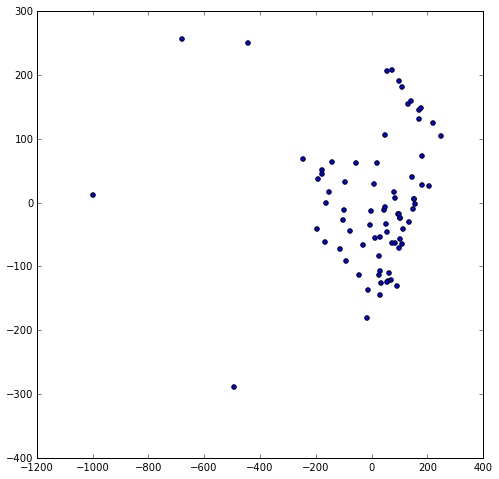

In [233]:
#red_datc = pd.DataFrame(reduced_cereal)
plt.figure(figsize = (8,8))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1])

In [234]:
kmeans = KMeans(3)
kmeans.fit(reduced_cereal)
cereal_cluster = kmeans.predict(reduced_cereal)

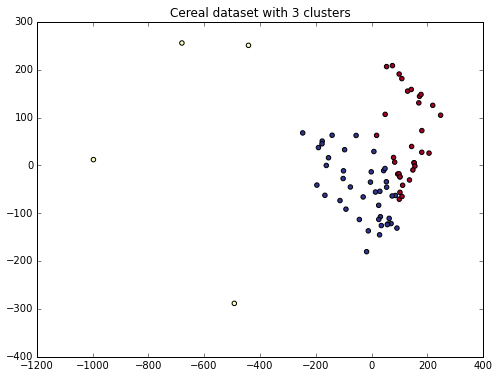

In [235]:

plt.figure(figsize=(8, 6))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1], c=cereal_cluster, cmap="RdYlBu")
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=250)
plt.title("Cereal dataset with 3 clusters")
plt.show()

In [236]:
cereal_cluster_list = cereal_cluster.tolist()
names_list = list(names)
zipped = zip(cereal_cluster_list, names_list)

In [237]:
#zipped1 = list(zipped)

In [238]:
pd.DataFrame(sorted(zipped1), columns=["Cluster", "Name"])

,Cluster,Name
0,0,100%_Bran
1,0,All-Bran
2,0,All-Bran_with_Extra_Fiber
3,0,Bran_Flakes
4,0,Cracklin'_Oat_Bran
5,0,"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats"
6,0,Fruitful_Bran
7,0,"Muesli_Raisins,_Dates,_&_Almonds"
8,0,"Muesli_Raisins,_Peaches,_&_Pecans"
9,0,Mueslix_Crispy_Blend
